<a href="https://colab.research.google.com/github/mmsyed03/DS_Projects/blob/main/Fraud_Detection_of_Online_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from google.colab import drive
# log into Google Drive and give access to upload CSVs from Shared Google Drive, link below
#https://drive.google.com/drive/u/0/folders/1Wy9Z29JE6c_CI7W-2xLzK1u60ULeaNHK

In [ ]:
# Read in CSVs from Shared Google Drive
drive.mount('/content/drive')
train_identity = pd.read_csv('/content/drive/MyDrive/Data144_FinalProject/train_identity.csv')
train_transaction = pd.read_csv('/content/drive/MyDrive/Data144_FinalProject/train_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/Data144_FinalProject/test_identity.csv')
test_transaction = pd.read_csv('/content/drive/MyDrive/Data144_FinalProject/test_transaction.csv')

NameError: ignored

In [ ]:
# Read from local
#train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
#test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [ ]:
# Cut down number of rows to fraction of train_transaction (for RAM issues, can comment cell out later)

train_transaction['weights'] = train_transaction['isFraud'].apply(lambda x: 10 if x == 1 else 1)

print(len(train_transaction[train_transaction['isFraud'] == 1]) / len(train_transaction))

fraction = 0.1
train_transaction = train_transaction.sample(frac=0.1, weights='weights', random_state=42)
# Compare percentage of fraud prevalent in before vs after sample
print(len(train_transaction[train_transaction['isFraud'] == 1]) / len(train_transaction))

0.024535423925667828
0.0338


In [ ]:
# Cut down number of rows to fraction of train_transaction (for RAM issues, can comment cell out later)

print(len(train_transaction[train_transaction['isFraud'] == 1]) / len(train_transaction))

fraction = 0.1
train_transaction = train_transaction.sample(frac=0.2, random_state=42)
# Compare percentage of fraud prevalent in before vs after sample
print(len(train_transaction[train_transaction['isFraud'] == 1]) / len(train_transaction))

0.03499000914417313
0.035916280014901616


In [ ]:
train_transaction.shape

(1852, 395)

In [ ]:
train_transaction['isFraud'].value_counts()

0    1813
1      39
Name: isFraud, dtype: int64

ToDo


*   Clean up data
*   Decide on models to test(Done = Decision tree;To try:Clustering?)
*   Assign people to test out different models
*   Download packages for models








Dataset link

https://www.kaggle.com/competitions/ieee-fraud-detection/

# Load in Data
#### **Make sure to upload data to colab before running the cell below**

In [ ]:
#train_transaction = pd.read_csv('train_transaction.csv')
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,weights
226907,3213907,1,5357582,8.459,C,4461,375.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
562538,3549538,0,14913470,92.000,W,9500,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
431706,3418706,0,10898016,129.950,W,14479,387.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
356403,3343403,0,8815272,39.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
98397,3085397,0,1985363,75.000,R,13108,215.0,150.0,visa,226.0,...,150.0,150.0,150.0,75.0,75.0,75.0,0.0,0.0,0.0,1


In [ ]:
#train_identity = pd.read_csv('train_identity.csv')
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
#test_transaction = pd.read_csv('test_transaction.csv')
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#test_identity = pd.read_csv('test_identity.csv')
test_identity.head()

NameError: ignored

In [ ]:
t = test_transaction.join(test_identity, on='TransactionID', how='outer', lsuffix='_left', rsuffix='_right')
t.head()

,TransactionID,TransactionID_left,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0.0,3663549,3663549.0,18403224.0,31.95,W,10409.0,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,3663550,3663550.0,18403263.0,49.00,W,4272.0,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,3663551,3663551.0,18403310.0,171.00,W,4476.0,574.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,3663552,3663552.0,18403310.0,284.95,W,10989.0,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,3663553,3663553.0,18403317.0,67.95,W,18018.0,452.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore Data

In [ ]:
train_transaction.shape

(590540, 394)

In [ ]:
test_transaction.shape

(506691, 393)

In [ ]:
train_identity.shape

(144233, 41)

In [ ]:
test_identity.shape

(141907, 41)

In [ ]:
# adjust the length you want to explore
train_transaction.columns[0:20]

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19'],
      dtype='object')

In [ ]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Columns: 395 entries, TransactionID to TransactionHour
dtypes: float64(376), int64(5), object(14)
memory usage: 11.6+ MB


In [ ]:
train_transaction.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
train_transaction.isna().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                   ... 
V336               3366
V337               3366
V338               3366
V339               3366
TransactionHour       0
Length: 395, dtype: int64

## plotting Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_transaction_corr = train_transaction.corr()
newFilterIndex = np.array(list(train_transaction_corr[(train_transaction_corr['isFraud'] >= 0.3) | (train_transaction_corr['isFraud'] <= -0.3)].index))
deleteCol = set(train_transaction.columns)-set(newFilterIndex)

<ipython-input-11-1834d209b560>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_transaction_corr = train_transaction.corr()


<Axes: >

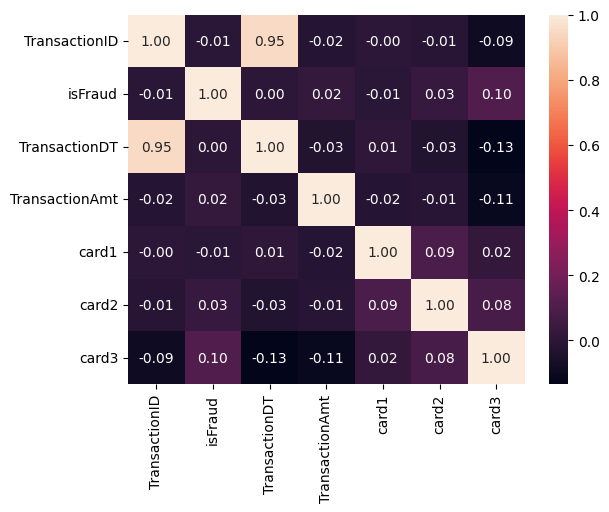

In [ ]:
import seaborn as sns
%matplotlib inline
sns.heatmap(train_transaction[['TransactionID',	'isFraud','TransactionDT','TransactionAmt','card1','card2','card3']].corr(),annot=True, fmt=".2f")

In [ ]:
P_emailTopTen = train_transaction['P_emaildomain'].value_counts()[:10]
R_emailTopTen = train_transaction['R_emaildomain'].value_counts()[:10]

<ipython-input-8-bab93ab01452>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(P_emailTopTen.index, rotation=90, ha='center')
<ipython-input-8-bab93ab01452>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(R_emailTopTen.index, rotation=90, ha='center')


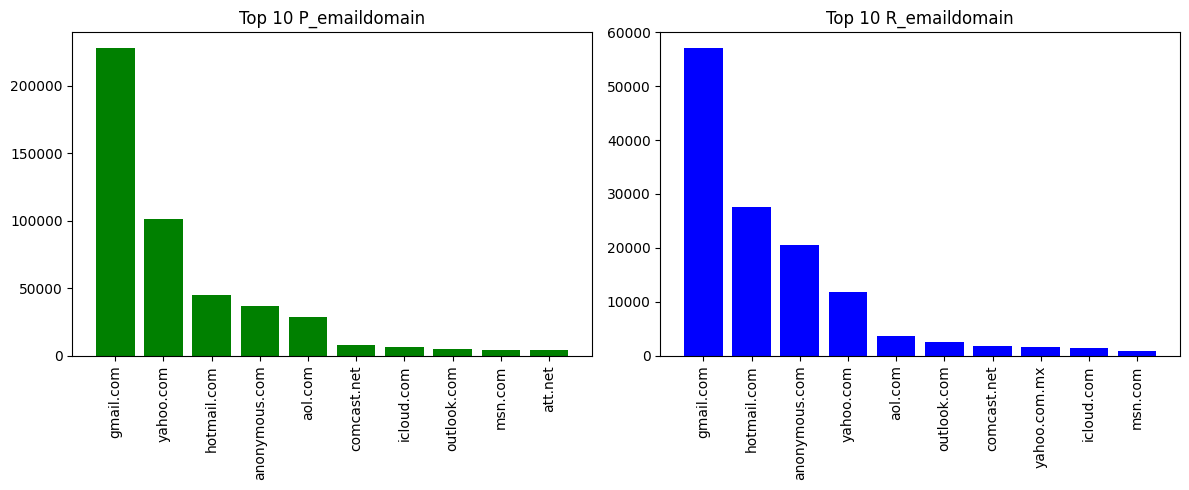

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(P_emailTopTen.index, P_emailTopTen.values, color='green')
axs[0].set_title('Top 10 P_emaildomain')
axs[0].set_xticklabels(P_emailTopTen.index, rotation=90, ha='center')


axs[1].bar(R_emailTopTen.index, R_emailTopTen.values, color='blue')
axs[1].set_title('Top 10 R_emaildomain')
axs[1].set_xticklabels(R_emailTopTen.index, rotation=90, ha='center')
plt.tight_layout()
plt.show()

<Axes: xlabel='DeviceType', ylabel='count'>

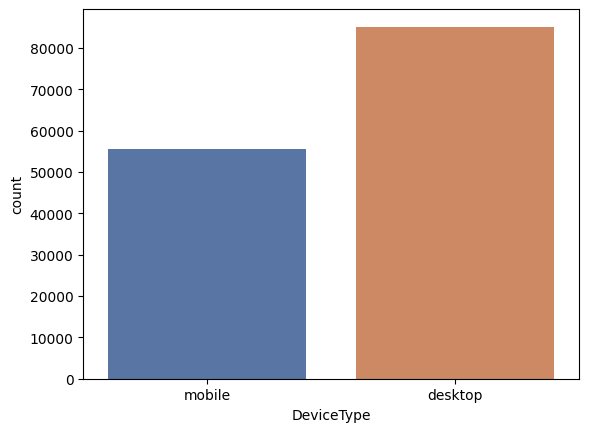

In [ ]:
train_identity['DeviceType'].value_counts()
sns.countplot(x='DeviceType', data=train_identity, palette="deep")

In [ ]:
train_transaction['TransactionHour'] = (train_transaction['TransactionDT'] // 3600) % 24

hour_count = train_transaction['TransactionHour'].value_counts().sort_index()

plt.plot(hour_count.index, hour_count.values)

plt.title('Fraud Occurrence by Hour')
plt.ylabel('Number of Records')
plt.xlabel('Hour')

plt.xticks(range(1,25))
plt.show()

<Axes: xlabel='TransactionHour', ylabel='Count'>

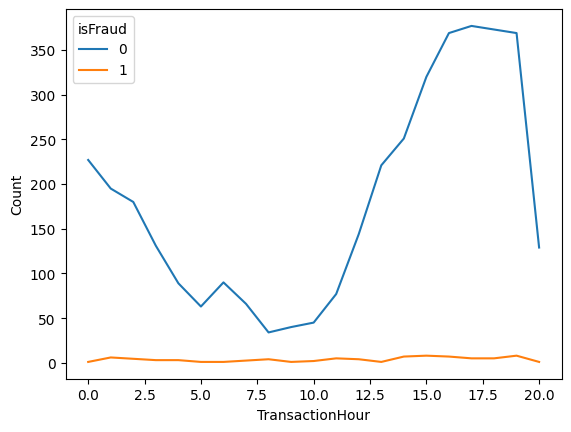

In [ ]:
train_transaction['TransactionHour'] = (train_transaction['TransactionDT'] // 3600) % 24

groupedDF = train_transaction.groupby(['TransactionHour','isFraud']).size().reset_index(name='Count')

sns.lineplot(data=groupedDF, x='TransactionHour',y='Count', hue='isFraud')

#plt.plot(hour_count.index, hour_count.values, marker='o')

#plt.title('Fraud Occurrence by Hour')
#plt.ylabel('Number of Records')
#plt.xlabel('Hour')

#plt.xticks(range(1,25))
#plt.show()

<ipython-input-34-a657c08c41c0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cc.index, rotation=90, ha='center')


[Text(0, 0, 'Windows'),
 Text(1, 0, 'iOS Device'),
 Text(2, 0, 'MacOS'),
 Text(3, 0, 'Trident/7.0'),
 Text(4, 0, 'rv:11.0'),
 Text(5, 0, 'rv:57.0'),
 Text(6, 0, 'SM-J700M Build/MMB29K'),
 Text(7, 0, 'SM-G610M Build/MMB29K'),
 Text(8, 0, 'SM-G531H Build/LMY48B'),
 Text(9, 0, 'rv:59.0')]

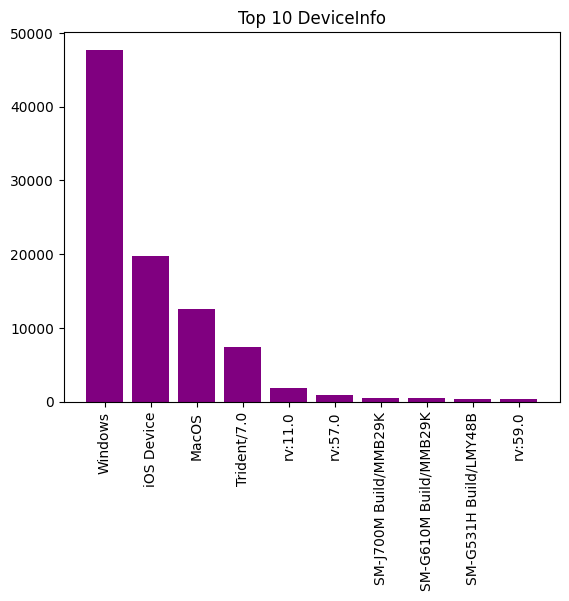

In [ ]:
cc = train_identity['DeviceInfo'].value_counts()[:10]
fig, ax = plt.subplots()
ax.bar(cc.index, cc.values, color='purple')
ax.set_title('Top 10 DeviceInfo')
ax.set_xticklabels(cc.index, rotation=90, ha='center')

Text(0.5, 1.0, 'Transaction Amounts with Outliers Removed')

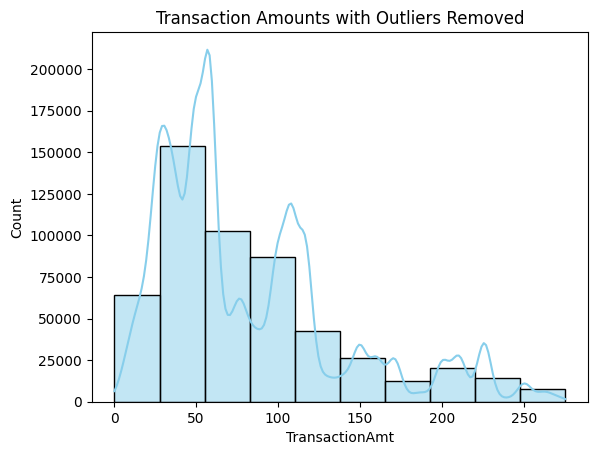

In [ ]:
# TransactionAmt Distribution with outliers removed
removedUpperOutliers = train_transaction['TransactionAmt'][train_transaction['TransactionAmt'] <= train_transaction['TransactionAmt'].quantile(0.90)]
sns.histplot(x=removedUpperOutliers, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Transaction Amounts with Outliers Removed")

In [ ]:
train_transaction_corr = train_transaction.corr()
newFilterIndex = np.array(list(train_transaction_corr[(train_transaction_corr['isFraud'] >= 0.3) | (train_transaction_corr['isFraud'] <= -0.3)].index))
deleteCol = set(train_transaction.columns)-set(newFilterIndex)

<ipython-input-24-1834d209b560>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_transaction_corr = train_transaction.corr()


<Axes: xlabel='ProductCD', ylabel='count'>

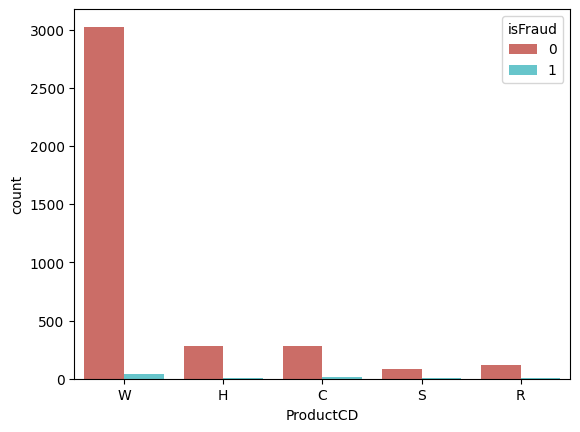

In [ ]:
sns.countplot(x='ProductCD',hue='isFraud', data=train_transaction, palette='hls')

0    569877
1     20663
Name: isFraud, dtype: int64

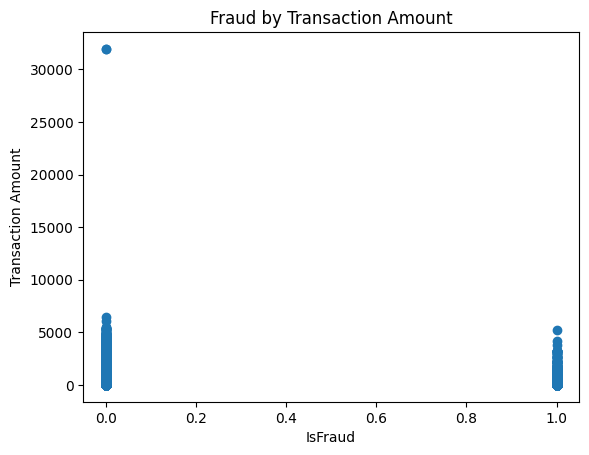

In [ ]:
import matplotlib.pyplot as plt

# plotting the data
plt.scatter(train_transaction['isFraud'], train_transaction['TransactionAmt'])

plt.title('Fraud by Transaction Amount')
plt.ylabel('Transaction Amount')
plt.xlabel('IsFraud')
train_transaction['isFraud'].value_counts()

<Axes: xlabel='card4', ylabel='count'>

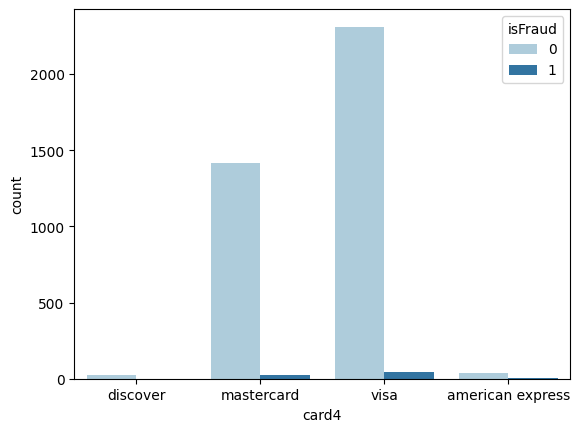

In [ ]:
sns.countplot(x='card4',hue='isFraud', data=train_transaction, palette='Paired')

# Data Cleaning

In [ ]:
# Only keep columns that have at least 7596(70%) non-null data
# Try 90% of 590540 for threshold instead (531486)?

perc_non_null = 0.9
thresh = perc_non_null*len(train_transaction)

train_DropNACol = train_transaction.dropna(axis=1,thresh=thresh)
train_DropNACol

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
470624,3457624,0,12153579,724.000,W,7826,481.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
565820,3552820,0,15005886,108.500,W,12544,321.0,150.0,visa,226.0,...,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
284083,3271083,0,6970178,47.950,W,9400,111.0,150.0,mastercard,224.0,...,0.0,87.949997,135.899994,87.949997,0.000000,0.000000,0.000000,0.0,0.0,0.0
239689,3226689,0,5673658,100.599,C,15885,545.0,185.0,visa,138.0,...,0.0,0.000000,0.000000,0.000000,100.599297,100.599297,100.599297,0.0,0.0,0.0
281855,3268855,0,6886780,107.950,W,15497,490.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373780,3360780,0,9314548,113.000,W,2242,555.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
245203,3232203,0,5843908,117.000,W,8763,555.0,150.0,visa,226.0,...,331.5,0.000000,452.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
450760,3437760,0,11491417,59.513,C,16136,204.0,185.0,visa,138.0,...,0.0,0.000000,0.000000,0.000000,119.026398,119.026398,119.026398,0.0,0.0,0.0
529422,3516422,0,13923492,21.580,C,15885,545.0,185.0,visa,138.0,...,0.0,20.964701,20.964701,20.964701,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
# Only keep rows that have at least 114(70%) non-null data
# With the previous results, now threshold of 90% of 112 (100)?

thresh = perc_non_null*len(list(train_DropNACol.columns))

train_DropNARow = train_DropNACol.dropna(axis=0)
train_DropNARow

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
470624,3457624,0,12153579,724.000,W,7826,481.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
565820,3552820,0,15005886,108.500,W,12544,321.0,150.0,visa,226.0,...,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
284083,3271083,0,6970178,47.950,W,9400,111.0,150.0,mastercard,224.0,...,0.0,87.949997,135.899994,87.949997,0.000000,0.000000,0.000000,0.0,0.0,0.0
239689,3226689,0,5673658,100.599,C,15885,545.0,185.0,visa,138.0,...,0.0,0.000000,0.000000,0.000000,100.599297,100.599297,100.599297,0.0,0.0,0.0
281855,3268855,0,6886780,107.950,W,15497,490.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125360,3112360,0,2486011,11.543,C,9633,296.0,185.0,visa,138.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
373780,3360780,0,9314548,113.000,W,2242,555.0,150.0,visa,226.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
245203,3232203,0,5843908,117.000,W,8763,555.0,150.0,visa,226.0,...,331.5,0.000000,452.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
450760,3437760,0,11491417,59.513,C,16136,204.0,185.0,visa,138.0,...,0.0,0.000000,0.000000,0.000000,119.026398,119.026398,119.026398,0.0,0.0,0.0


In [ ]:
#Returns a new df that contains columns mutually shared by trainDF and testDF
def returnNewTestDf(trainDf, testDf):

  drop_features = np.array(list(set(testDf.columns) - set(trainDf.columns)))

  return testDf.drop(columns = drop_features)

# Model training

In [ ]:
X_train = train_DropNARow.drop(columns = 'isFraud')
y_train = train_DropNARow['isFraud']
X_test = returnNewTestDf(X_train, test_transaction)

In [ ]:
X_train.shape

(115611, 111)

## Feature Engineering

In [ ]:
X_train['TransactionAmt_log'] = np.log(X_train['TransactionAmt'])
X_train['TransactionAmt_decimal'] = X_train['TransactionAmt'] % 1
X_train['TransactionAmt_decimal_len'] = X_train['TransactionAmt'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0)
X_test['TransactionAmt_log'] = np.log(X_test['TransactionAmt'])
X_test['TransactionAmt_decimal'] = X_test['TransactionAmt'] % 1
X_test['TransactionAmt_decimal_len'] = X_test['TransactionAmt'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0)
#X_train['nulls_count'] = X_train.isnull().sum(axis=1)
#X_test['nulls_count'] = X_test.isnull().sum(axis=1)
X_train['TransactionHour'] = (X_train['TransactionDT'] // 3600) % 24
X_test['TransactionHour'] = (X_test['TransactionDT'] // 3600) % 24
X_train['TransactionDay'] = (X_train['TransactionDT'] // (3600 * 24)) % 7
X_test['TransactionDay'] = (X_test['TransactionDT'] // (3600 * 24)) % 7

# Standardized transaction amount by card1
card1_mean = X_train.groupby('card1')['TransactionAmt'].transform('mean')
X_train['TransactionAmt_card1_mean'] = (X_train['TransactionAmt'] - card1_mean) / card1_mean
card1_mean_test = X_test.groupby('card1')['TransactionAmt'].transform('mean')
X_test['TransactionAmt_card1_mean'] = (X_test['TransactionAmt'] - card1_mean_test) / card1_mean_test

# Interaction between C1 and C2
X_train['C1_C2_interaction'] = X_train['C1'] * X_train['C2']
X_test['C1_C2_interaction'] = X_test['C1'] * X_test['C2']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

enc = OneHotEncoder(handle_unknown='ignore')

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_enc = enc.fit_transform(X_train_split)
X_val_enc = enc.transform(X_val_split)

## Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
#GridSearchCV looks for the best parameters for the estimator

import time

tic = time.time()

grid_values = {'ccp_alpha':np.linspace(0,0.5,10),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight':['balanced'],
               'random_state': [88]}

dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, scoring='accuracy', cv = 5, verbose = 1)
dtc_cv.fit(X_train_enc, y_train_split)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

dtc_pred = dtc_cv.predict(X_val_enc)
dtc_cm = confusion_matrix(y_val_split, dtc_pred)
dtc_acc = accuracy_score(y_val_split, dtc_pred)

print ("Confusion Matrix: \n", dtc_cm)
print ("\nAccuracy:", dtc_acc)

dtc_TPR =  dtc_cm.ravel()[3] / (dtc_cm.ravel()[3] + dtc_cm.ravel()[2]) # TPR = TP/P = TP/(TP+FN)
dtc_FPR =  dtc_cm.ravel()[1] / (dtc_cm.ravel()[1] + dtc_cm.ravel()[0]) # FPR = FP/N = FP/(FP+TN)
dtc_PRE = dtc_cm.ravel()[3] / (dtc_cm.ravel()[3] + dtc_cm.ravel()[1]) # PRE = TP/(TP+FP)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: ignored

In [ ]:
sns.heatmap(dtc_cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_val_split, dtc_pred))

In [ ]:
dtc_cv.cv_results_['mean_test_score']

In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.5])
plt.ylim([0.2, 1])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, a = roc_curve(y_val_split, dtc_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**Kmeans**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

numerical_columns = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train_split[numerical_columns]

imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=numerical_columns)

kmeans = KMeans(n_clusters=2, random_state=88)
X_train_split['cluster'] = kmeans.fit_predict(X_train_numeric_imputed)

X_val_numeric = returnNewTestDf(X_train_numeric_imputed, X_val_split)
X_val_numeric_imputed = pd.DataFrame(imputer.transform(X_val_numeric), columns=numerical_columns)
X_val_split['cluster'] = kmeans.predict(X_val_numeric_imputed)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_split[['cluster']], y_train_split)

cluster_pred_val = dtc.predict(X_val_split[['cluster']])

accuracy_score(y_val_split, cluster_pred_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_split, cluster_pred_val)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_val_split, cluster_pred_val))

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, a = roc_curve(y_val_split, cluster_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Interpretation of Confusion Matrix for K-Means:
The model while having 0.96 precision for class 0, is identifying 0% of actual fraud.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X_train_split.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V319,V320,V321,TransactionAmt_log,TransactionAmt_decimal,TransactionAmt_decimal_len,TransactionHour,TransactionDay,TransactionAmt_card1_mean,C1_C2_interaction
476917,3463917,12344723,255.97,W,17872,348.0,150.0,mastercard,224.0,credit,...,0.0,0.0,0.0,5.545060,0.97,2,21,2,0.227235,16864.0
127824,3114824,2550826,209.95,W,12577,268.0,150.0,visa,166.0,debit,...,0.0,0.0,0.0,5.346869,0.95,2,12,1,1.306355,6.0
289126,3276126,7110935,159.95,W,5033,269.0,150.0,mastercard,224.0,debit,...,0.0,0.0,0.0,5.074861,0.95,2,7,5,0.743042,2.0
449978,3436978,11475922,34.00,W,16224,555.0,150.0,visa,226.0,debit,...,0.0,164.0,0.0,3.526361,0.00,1,19,6,-0.427067,2.0
86798,3073798,1823276,50.00,H,10486,514.0,150.0,mastercard,219.0,credit,...,0.0,0.0,0.0,3.912023,0.00,1,2,0,-0.796931,1.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

categorical_columns = X_train_split.select_dtypes(include=['object']).columns.tolist()
preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough')

y_train_split_array = y_train_split.astype(np.int32).to_numpy()
y_val_split_array = y_val_split.astype(np.int32).to_numpy()

X_train_transformed = preproc.fit_transform(X_train_split)
X_val_transformed = preproc.transform(X_val_split)

imputer = SimpleImputer(strategy='constant',fill_value=0)
X_train_imputed = imputer.fit_transform(X_train_transformed)
X_val_imputed = imputer.transform(X_val_transformed)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train_split_array)

y_pred_rf = rf_model.predict(X_val_imputed)
print(classification_report(y_val_split_array, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22314
           1       0.89      0.35      0.50       809

    accuracy                           0.98     23123
   macro avg       0.93      0.67      0.74     23123
weighted avg       0.97      0.98      0.97     23123



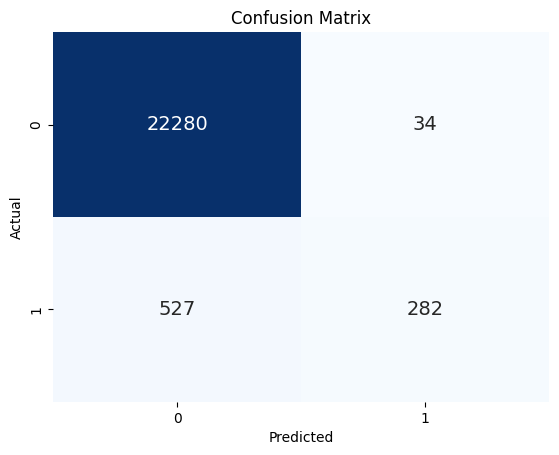

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22314
           1       0.89      0.35      0.50       809

    accuracy                           0.98     23123
   macro avg       0.93      0.67      0.74     23123
weighted avg       0.97      0.98      0.97     23123



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_split_array, y_pred_rf)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_val_split_array, y_pred_rf))


Overall Analysis on Random Forest Model:
While we are accurate at 97%, this score is misleading when we are thinking about fraud specifically and in this dataset in particular where fraud only occurs at a 3.5% prevalence. This low prevalence can create a high accuracy rate overall, but does not account for any issues in classifying when it comes to the minority class. Instead, we should also look at other measures to get an accurate look at what is happening. For example, when looking at when we are classifying class 1 fraudulent transactions specifically, we can use precision, which is 0.82. This means that when the model is actually predicting fraud, that means it is correct 82% of the time, which is a good level that is lower than for class 0, but given the nature of how often fraud actually occurs versus how often fraud does not occur in the dataset, this is actually quite good. However, then, when looking at recall for class 1, we are at 0.21, which means the model is only actually classifying and getting 21% of the actual fraud that is occuring. This is of concern and means there are a high rate of false negatives (fraud not being captured by the model). The f-1 score is 0.33 for class 1 fraudulent transactions and this shows ultimately the tradeoff between recall and precision.

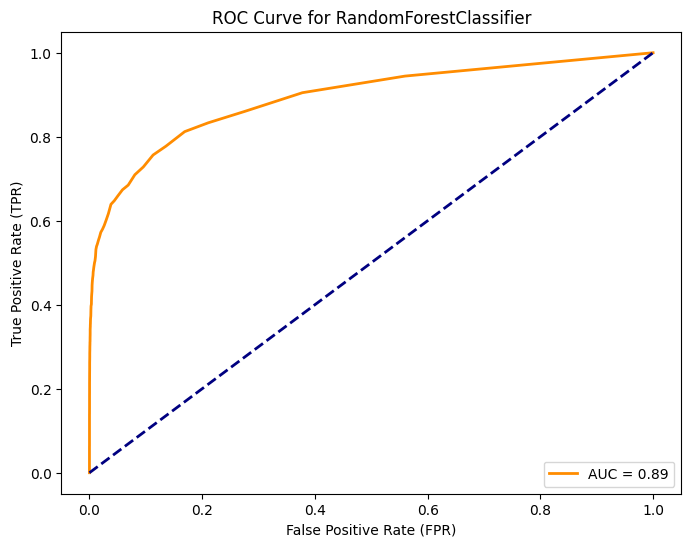

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob_rf = rf_model.predict_proba(X_val_imputed)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val_split_array, y_prob_rf)

# Calculate area under the curve (AUC)
roc_auc_rf =auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


Random Forest Model Attempt #2 to Improve Class 1 Recall

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_imputed, y_train_split_array)

X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = rf_model_resampled.predict(X_val_resampled)

print(classification_report(y_val_resampled, y_pred_resampled))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17849
           1       1.00      1.00      1.00     17819

    accuracy                           1.00     35668
   macro avg       1.00      1.00      1.00     35668
weighted avg       1.00      1.00      1.00     35668



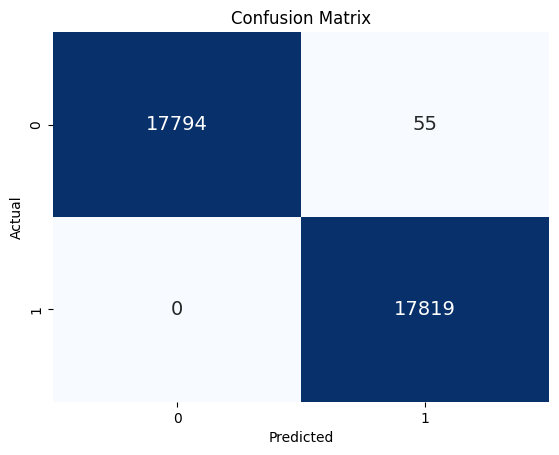

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17849
           1       1.00      1.00      1.00     17819

    accuracy                           1.00     35668
   macro avg       1.00      1.00      1.00     35668
weighted avg       1.00      1.00      1.00     35668



In [ ]:


cm = confusion_matrix(y_val_resampled, y_pred_resampled)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_val_resampled, y_pred_resampled))

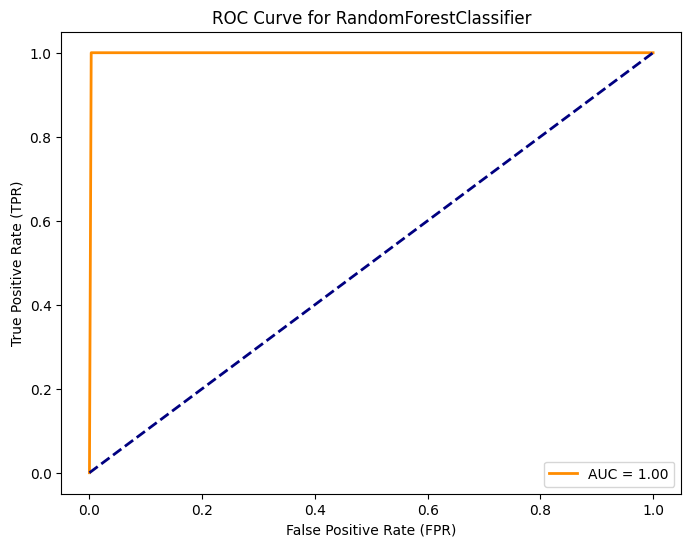

In [ ]:
y_prob_rf = rf_model_resampled.predict_proba(X_val_imputed)[:, 1]
# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val_resampled, y_pred_resampled)

# Calculate area under the curve (AUC)
roc_auc_rf =auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

Here we employed resampling techniques like oversampling the minority class of fraud and undersampling the majority class, but this should be taken with caution as this often leads to overfitting and is not representative of what we would see in the real world.

We can see that the recall improved drastically for class 1.

# XGBoost

In [ ]:
# GridSearchCV for XGBoost

enc = OneHotEncoder(handle_unknown='ignore')

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_enc = enc.fit_transform(X_train_split)
X_val_enc = enc.transform(X_val_split)

import time

tic = time.time()

# Set class weights
class_weights = {0: 1, 1: 10}  # Class 0: 1, Class 1: 10

# Set "scale_pos_weight" based on class balance
pos_weight = sum(class_weights.values()) / sum(class_weights.keys())


grid_values_xgb = {'learning_rate': [0.05, 0.1, 0.2],
                   'max_depth': [4,5,6],
                   'subsample': [0.5],
                   'colsample_bytree': [0.8,1],
                   'lambda': [1,1.1,1.2],
                   'alpha': [0,0.1,0.2],
                   'n_estimators': [100],
                   'scale_pos_weight':[pos_weight],
                   'random_state': [88]}

xgb_model = XGBClassifier()
xgb_cv = GridSearchCV(xgb_model, param_grid=grid_values_xgb, scoring='recall', cv=5, verbose=1)
xgb_cv.fit(X_train_enc, y_train_split)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

xgb_pred = xgb_cv.predict(X_val_enc)
xgb_cm = confusion_matrix(y_val_split, xgb_pred)
xgb_acc = accuracy_score(y_val_split, xgb_pred)

print ("Confusion Matrix: \n", xgb_cm)
print ("\nAccuracy:", xgb_acc)

xgb_TPR =  xgb_cm.ravel()[3] / (xgb_cm.ravel()[3] + xgb_cm.ravel()[2]) # TPR = TP/P = TP/(TP+FN)
xgb_FPR =  xgb_cm.ravel()[1] / (xgb_cm.ravel()[1] + xgb_cm.ravel()[0]) # FPR = FP/N = FP/(FP+TN)
xgb_PRE = xgb_cm.ravel()[3] / (xgb_cm.ravel()[3] + xgb_cm.ravel()[1]) # PRE = TP/(TP+FP)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
time: 1857.2 s
Confusion Matrix: 
 [[756   1]
 [ 11   5]]

Accuracy: 0.9844760672703752


In [ ]:
from sklearn.metrics import recall_score
recall_score(y_val_split, xgb_pred, average='weighted')

0.9844760672703752

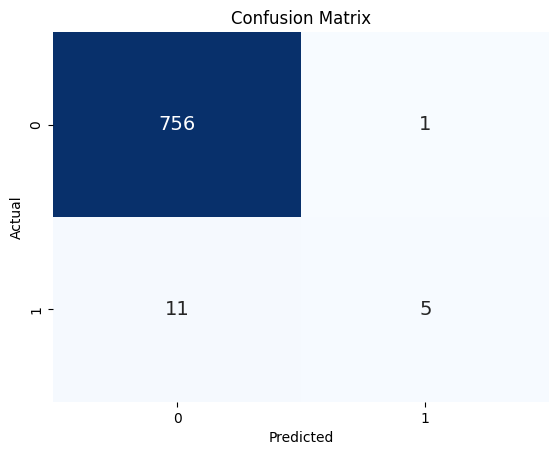

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       757
           1       0.83      0.31      0.45        16

    accuracy                           0.98       773
   macro avg       0.91      0.66      0.72       773
weighted avg       0.98      0.98      0.98       773



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_split, xgb_pred)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_val_split, xgb_pred))

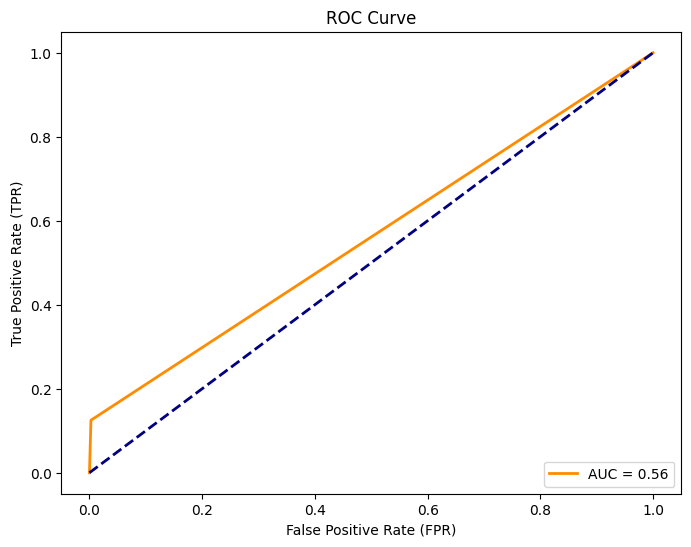

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, a = roc_curve(y_val_split, xgb_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Other Visualizations for Presentation

In [ ]:
import pandas as pd

columns = ['Year', 'Amount (in billions)']
data = [(2014, 18.11), (2015, 21.84), (2016, 22.8), (2017, 23.97), (2018, 27.86), (2019, 28.65), (2020, 28.43), (2021, 32.34)]
df = pd.DataFrame(data, columns=columns)

print(df)

   Year  Amount (in billions)
0  2014                 18.11
1  2015                 21.84
2  2016                 22.80
3  2017                 23.97
4  2018                 27.86
5  2019                 28.65
6  2020                 28.43
7  2021                 32.34


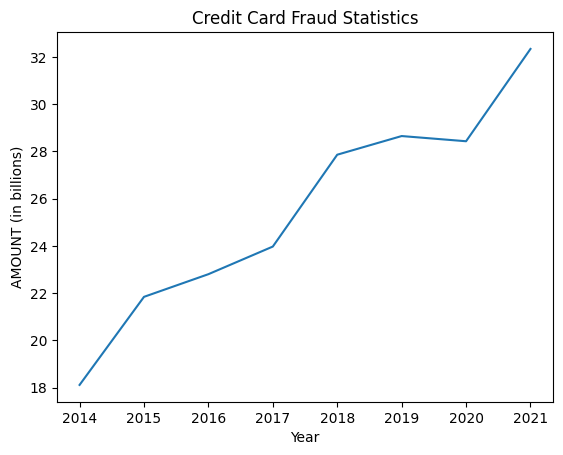

In [ ]:
import matplotlib.pyplot as plt

plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], [18.11, 21.84, 22.8, 23.97, 27.86, 28.65, 28.43, 32.34])
plt.title("Credit Card Fraud Statistics")
plt.xlabel("Year")
plt.ylabel("AMOUNT (in billions)")
plt.show()